In [244]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Simulate dataset

simulate uniform and normal data

In [245]:
np.random.seed(42)

uniform = np.random.rand(1000, 2)
normal = np.random.randn(1000, 1)

add intercept column

In [246]:
uniform_ones = np.c_[np.ones((1000, 1)), uniform]

uniform_ones.shape

(1000, 3)

### Gradient descent - learning rate

create gradient descent function

In [247]:
def gradient_descent(X, y, learning_rate=0.1, epochs=100):
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for epoch in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient
    
    return theta

Use learning rate = 0.1 and calculate theta for each fifth epoch from 1 to 500

In [248]:
def plot_training(x_range, learning_history, title):

    plt.plot(x_range, learning_history[:, 0], label="intercept")
    plt.plot(x_range, learning_history[:, 1], label="b1")
    plt.plot(x_range, learning_history[:, 2], label="b2")

    plt.grid(True)
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("theta-values")
    plt.title(title)
    plt.show()

plot training results with 500 epochs and learning rate 0.1

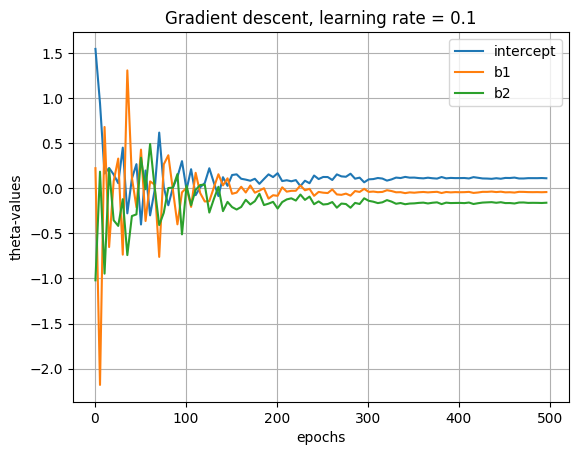

In [249]:
plot_training(x_range=range(1, 500, 5), 
              learning_history=np.array([gradient_descent(X=uniform_ones, y=normal, learning_rate=0.1, epochs=i) for i in range(1, 500, 5)]).squeeze(axis=2), 
              title="Gradient descent, learning rate = 0.1")

plot training results with 5000 epochs and learning rate 0.01

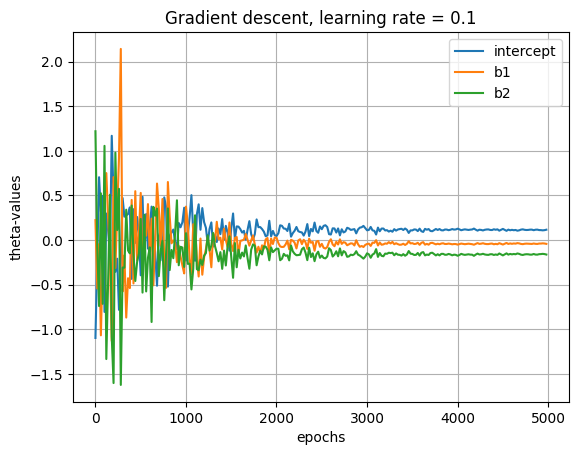

In [250]:
plot_training(x_range=range(1, 5000, 20), 
              learning_history=np.array([gradient_descent(X=uniform_ones, y=normal, learning_rate=0.01, epochs=i) for i in range(1, 5000, 20)]).squeeze(axis=2), 
              title="Gradient descent, learning rate = 0.1")

plot training results with 500 epochs and learning rate 0.05

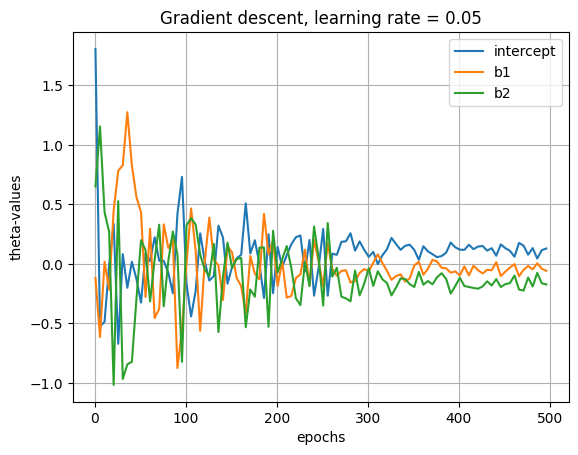

In [251]:
plot_training(x_range=range(1, 500, 5), 
              learning_history=np.array([gradient_descent(X=uniform_ones, y=normal, learning_rate=0.05, epochs=i) for i in range(1, 500, 5)]).squeeze(axis=2), 
              title="Gradient descent, learning rate = 0.05")

### Stochastic Gradient Descent - learning rate

In [252]:
def SGD(X, y, epochs=100, learning_schedule_params=(5, 50)):
    def rate_schedule(t):
        return learning_schedule_params[0] / (t + learning_schedule_params[1])
    
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for epoch in range(epochs):
        for i in range(m):
            random_i = np.random.randint(m)
            x_i = X[random_i:random_i + 1]
            y_i = y[random_i:random_i + 1]

            gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
            eta = rate_schedule(epoch * m + i)

            theta -= eta * gradients
    return theta

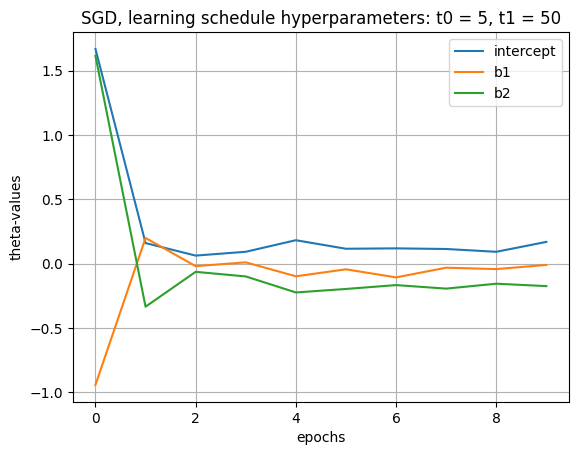

In [253]:
plot_training(x_range=range(10), 
              learning_history=np.array([SGD(X=uniform_ones, y=normal, epochs=i) for i in range(10)]).squeeze(axis=2), 
              title="SGD, learning schedule hyperparameters: t0 = 5, t1 = 50")

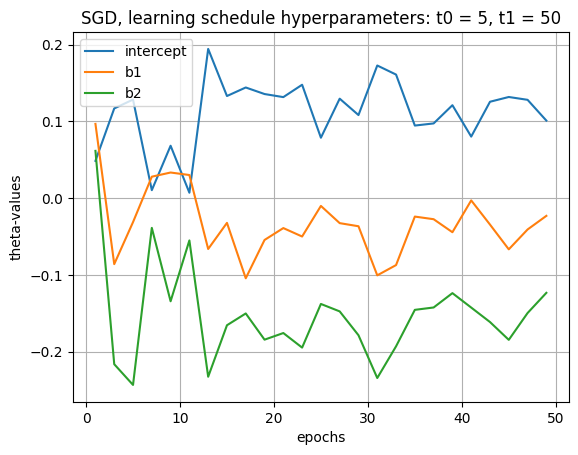

In [254]:
plot_training(x_range=range(1, 50, 2), 
              learning_history=np.array([SGD(X=uniform_ones, y=normal, epochs=i) for i in range(1, 50, 2)]).squeeze(axis=2), 
              title="SGD, learning schedule hyperparameters: t0 = 5, t1 = 50")

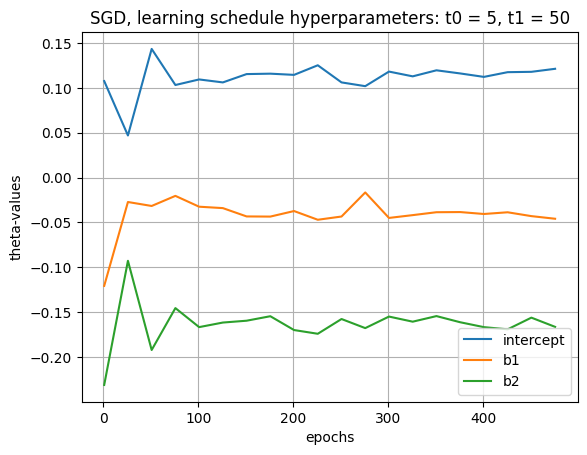

In [255]:
plot_training(x_range=range(1, 500, 25), 
              learning_history=np.array([SGD(X=uniform_ones, y=normal, epochs=i) for i in range(1, 500, 25)]).squeeze(axis=2), 
              title="SGD, learning schedule hyperparameters: t0 = 5, t1 = 50")

### Mini Batch Gradient Descent

In [264]:
def mini_batch_gradient_descent(X, y, epochs=100, learning_schedule_params=(5, 50), mini_batch_size=32):
    def rate_schedule(t):
        return learning_schedule_params[0] / (t + learning_schedule_params[1])
    
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for epoch in range(epochs):
        random_permutation = np.random.permutation(m)
        X_Batch = X[random_permutation][:mini_batch_size]
        y_Batch = y[random_permutation][:mini_batch_size]

        for i in range(mini_batch_size):
            #random_i = np.random.randint(len(X_Batch))
            #print(X_Batch)
            #X_i = X_Batch[random_i:random_i + 1]
            #y_i = y_Batch[random_i:random_i + 1]
            X_i = X_Batch[i:i + 1]
            y_i = y_Batch[i:i + 1]

            gradients = np.divide(2, mini_batch_size) * (X_i.T @ (X_i @ theta - y_i))
            eta = rate_schedule(epoch * mini_batch_size + i)

            theta -= eta * gradients
    return theta

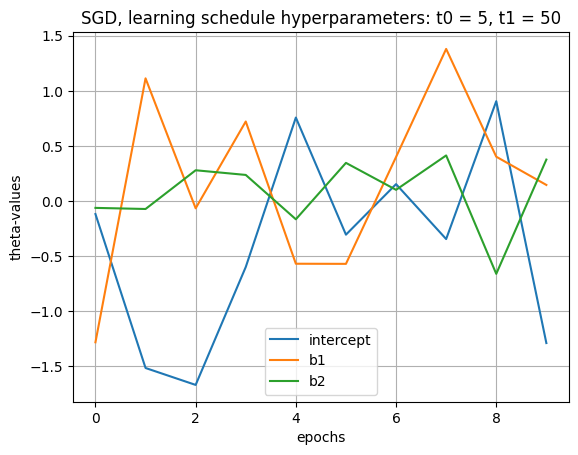

In [265]:
plot_training(x_range=range(10), 
              learning_history=np.array([mini_batch_gradient_descent(X=uniform_ones, y=normal, epochs=i) for i in range(10)]).squeeze(axis=2), 
              title="SGD, learning schedule hyperparameters: t0 = 5, t1 = 50")